In [2]:
#Ejercicio 8.14

Considere la ecuación de Schrödinger unidimensional e independiente del tiempo en un potencial armónico $V (x) = Vox ^ 2 / a ^ 2$, donde $V$ y a son constantes.


$A)$ escriba la ecuación de Schrödinger para este problema y conviértala de una ecuación de segundo orden a dos de primer orden, como en el ejemplo 8.9. escriba un programa, o modifique el del ejemplo 8.9, encuentre las energías del estado fundamental y los dos primeros estados excitados para estas ecuaciones cuando $m$ es la masa de electrones, $Vo = 50eV$ y $a = 10 ^{-11} m$. Tenga en cuenta que, en teoría, la función de onda llega hasta $X= \pm \infty $, pero puede obtener buenas respuestas utilizando un intervalo grande pero finito. intente usar $X=-10a$ a $+10a$, con la función de onda $\psi =0$ en ambos límites. (en efecto, está colocando el oscilador armónico en una caja con paredes inpenetrables). La función de onda es real en todas partes, por lo que no necesita usar variables complejas y puede usar puntos espaciados uniformemente para la solución, no es necesario Utilice un método de adaptación de anuncios para este problema.

Se sabe que el oscilador armónico cuántico tiene estados de energía que están igualmente espaciados. Verifique que esto sea cierto, para la precisión de su cálculo, para sus respuestas. (Sugerencia: el estado fundamental tiene energía en el rango de $100$ a $200 ev$)

In [3]:
from scipy import array, arange, sum, sqrt
from pylab import plot, show, xlabel, ylabel

# Constants
e = 1.602 * 10 ** -19
V0 = 50 * e  # J
a = 10 ** -11  # Angstrom
x_0 = -10 ** -10
x_f = 10 ** -10
psi_0 = 0.0
phi_0 = 1.0
hbar = 1.05457 * 10 ** -34  # J*s
m = 9.10938 * 10 ** -31 # electron mass in kg
N = 1000  # number of steps to use in Runge-Kutta
h = (x_f - x_0) / N


def psi(E):
    def f(r, x):
        def V(x):
            return V0 * x ** 2 / a ** 2

        #def V(x):
        #    return V0 * x ** 4 / a ** 4

        psi = r[0]
        phi = r[1]
        return array([phi, (2 * m / hbar ** 2) * (V(x) - E) * psi], float)

    r = array([psi_0, phi_0] ,float)
    wavefunction = []
    for x in arange(x_0, x_f, h):
        wavefunction.append(r[0])
        k1 = h * f(r, x)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h)
        k4 = h * f(r + k3, x + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return array(wavefunction, float)


def secant_root(E1, E2):
    target_accuracy = e / 1000 #  eV
    wavefunction = psi(E1)
    psi2 = wavefunction[N - 1]
    while abs(E1 - E2) > target_accuracy:
        wavefunction = psi(E2)
        psi1, psi2 = psi2, wavefunction[N - 1]
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)

    # Normalize the wavefunction using Simpson's rule
    mod_squared = wavefunction * wavefunction
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + \
            4 * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )

    return E2 / e, wavefunction / sqrt(2*integral)



# First three lowest energies of anharmonic oscillator
E0, psi0 = secant_root(0, 0.5*e)
E1, psi1 = secant_root(400*e, 600*e)
E2, psi2 = secant_root(900*e, 1100*e)
print('E_0 = ', E0, 'eV')
print('E_1 = ', E1, 'eV')
print('E_2 = ', E2, 'eV')

xpoints = arange(x_0, x_f, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
#plot(xpoints[x_range], psi0[x_range], 'k')
#plot(xpoints[x_range], psi1[x_range], 'b')
#plot(xpoints[x_range], psi2[x_range], 'g')
#xlabel('x (m)')
#ylabel('psi')
#show()

E_0 =  138.02881165268067 eV
E_1 =  690.1440640909451 eV
E_2 =  1242.2593232862532 eV


B) Ahora modifique su programa para calcular las mismas tres energías para el oscilador con $V (x) = Vox ^ 4 / a ^ 4$, con los mismos valores de parámetros.

In [4]:
from scipy import array, arange, sum, sqrt
from pylab import plot, show, xlabel, ylabel

# Constants
e = 1.602 * 10 ** -19
V0 = 50 * e  # J
a = 10 ** -11  # Angstrom
x_0 = -10 ** -10
x_f = 10 ** -10
psi_0 = 0.0
phi_0 = 1.0
hbar = 1.05457 * 10 ** -34  # J*s
m = 9.10938 * 10 ** -31 # electron mass in kg
N = 1000  # number of steps to use in Runge-Kutta
h = (x_f - x_0) / N


def psi(E):
    def f(r, x):
        #def V(x):
            #return V0 * x ** 2 / a ** 2

        def V(x):
            return V0 * x ** 4 / a ** 4

        psi = r[0]
        phi = r[1]
        return array([phi, (2 * m / hbar ** 2) * (V(x) - E) * psi], float)

    r = array([psi_0, phi_0] ,float)
    wavefunction = []
    for x in arange(x_0, x_f, h):
        wavefunction.append(r[0])
        k1 = h * f(r, x)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h)
        k4 = h * f(r + k3, x + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return array(wavefunction, float)


def secant_root(E1, E2):
    target_accuracy = e / 1000 #  eV
    wavefunction = psi(E1)
    psi2 = wavefunction[N - 1]
    while abs(E1 - E2) > target_accuracy:
        wavefunction = psi(E2)
        psi1, psi2 = psi2, wavefunction[N - 1]
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)

    # Normalize the wavefunction using Simpson's rule
    mod_squared = wavefunction * wavefunction
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + \
            4 * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )

    return E2 / e, wavefunction / sqrt(2*integral)



# First three lowest energies of anharmonic oscillator
E0, psi0 = secant_root(0, 0.5*e)
E1, psi1 = secant_root(400*e, 600*e)
E2, psi2 = secant_root(900*e, 1100*e)
print('E_0 = ', E0, 'eV')
print('E_1 = ', E1, 'eV')
print('E_2 = ', E2, 'eV')

xpoints = arange(x_0, x_f, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
#plot(xpoints[x_range], psi0[x_range], 'k')
#plot(xpoints[x_range], psi1[x_range], 'b')
#plot(xpoints[x_range], psi2[x_range], 'g')
#xlabel('x (m)')
#ylabel('psi')
#show()

E_0 =  205.31650347109755 eV
E_1 =  735.7256474286083 eV
E_2 =  1443.636921666496 eV


C)

E_0 =  138.02881165268067 eV
E_1 =  690.1440640909451 eV
E_2 =  1242.2593232862532 eV


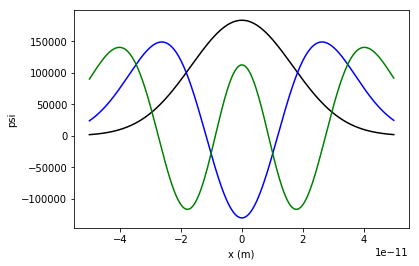

In [8]:
from scipy import array, arange, sum, sqrt
from pylab import plot, show, xlabel, ylabel

# Constants
e = 1.602 * 10 ** -19
V0 = 50 * e  # J
a = 10 ** -11  # Angstrom
x_0 = -10 ** -10
x_f = 10 ** -10
psi_0 = 0.0
phi_0 = 1.0
hbar = 1.05457 * 10 ** -34  # J*s
m = 9.10938 * 10 ** -31 # electron mass in kg
N = 1000  # number of steps to use in Runge-Kutta
h = (x_f - x_0) / N


def psi(E):
    def f(r, x):
        def V(x):
            return V0 * x ** 2 / a ** 2

        #def V(x):
        #    return V0 * x ** 4 / a ** 4

        psi = r[0]
        phi = r[1]
        return array([phi, (2 * m / hbar ** 2) * (V(x) - E) * psi], float)

    r = array([psi_0, phi_0] ,float)
    wavefunction = []
    for x in arange(x_0, x_f, h):
        wavefunction.append(r[0])
        k1 = h * f(r, x)
        k2 = h * f(r + 0.5 * k1, x + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h)
        k4 = h * f(r + k3, x + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return array(wavefunction, float)


def secant_root(E1, E2):
    target_accuracy = e / 1000 #  eV
    wavefunction = psi(E1)
    psi2 = wavefunction[N - 1]
    while abs(E1 - E2) > target_accuracy:
        wavefunction = psi(E2)
        psi1, psi2 = psi2, wavefunction[N - 1]
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)

    # Normalize the wavefunction using Simpson's rule
    mod_squared = wavefunction * wavefunction
    integral = h / 3 *(mod_squared[0] + mod_squared[N//2 - 1] + \
            4 * sum(mod_squared[1 : N//2 : 2]) + 2 * sum(mod_squared[0 : N//2 + 1 : 2]) )

    return E2 / e, wavefunction / sqrt(2*integral)



# First three lowest energies of anharmonic oscillator
E0, psi0 = secant_root(0, 0.5*e)
E1, psi1 = secant_root(400*e, 600*e)
E2, psi2 = secant_root(900*e, 1100*e)
print('E_0 = ', E0, 'eV')
print('E_1 = ', E1, 'eV')
print('E_2 = ', E2, 'eV')

xpoints = arange(x_0, x_f, h)
x_range = slice(N // 4 ,  3 * N // 4 , 1)
plot(xpoints[x_range], psi0[x_range], 'k')
plot(xpoints[x_range], psi1[x_range], 'b')
plot(xpoints[x_range], psi2[x_range], 'g')
xlabel('x (m)')
ylabel('psi')
show()